# Municiple Limits

In [1]:
import geopandas as gpd 

In [3]:
ml = gpd.read_file('data/jurisdiction.zip').to_crs(4267)
ml.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OBJECTID    115 non-null    int64         
 1   JURISDICTI  115 non-null    object        
 2   JURISDIC_1  115 non-null    object        
 3   created_us  115 non-null    object        
 4   created_da  115 non-null    datetime64[ms]
 5   last_edite  115 non-null    object        
 6   last_edi_1  115 non-null    datetime64[ms]
 7   STAr        115 non-null    float64       
 8   STLe        115 non-null    float64       
 9   geometry    115 non-null    geometry      
dtypes: datetime64[ms](2), float64(2), geometry(1), int64(1), object(4)
memory usage: 9.1+ KB


In [6]:
drops = [
    'STLe', 'STAr', 'last_edi_1', 'last_edite',
    'created_da', 'created_us'
]
ml.drop(columns=drops, inplace=True)
ml.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    115 non-null    int64   
 1   JURISDICTI  115 non-null    object  
 2   JURISDIC_1  115 non-null    object  
 3   geometry    115 non-null    geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 3.7+ KB


In [7]:
ml.JURISDIC_1.unique()

array(['UNINCORPORATED AREAS', 'VILLAGE', 'CITY', 'TOWN'], dtype=object)

In [9]:
ml.rename(columns=dict(
    JURISDICTI = 'Jurisdiction', 
    JURISDIC_1 = 'Type'
), inplace=True)
ml.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID      115 non-null    int64   
 1   Jurisdiction  115 non-null    object  
 2   Type          115 non-null    object  
 3   geometry      115 non-null    geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 3.7+ KB


In [10]:
ml.to_file('../../../data/local/abq_city_data.gpkg', 
          layer='municiple_borders')

In [11]:
ml.to_file('../../../localData/municipalities.gpkg')

In [12]:
import contextily as ctx

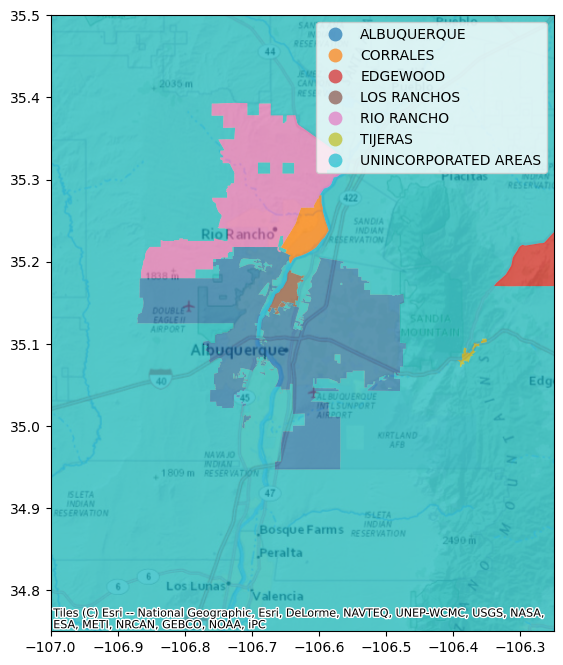

In [25]:
ax = ml.plot(column='Jurisdiction', figsize=(10,8), 
             alpha=0.7, legend=True)
ax.set_ylim(34.75, 35.50)
ax.set_xlim(-107.0, -106.25)
ctx.add_basemap(ax, crs=ml.crs, source=ctx.providers.Esri.NatGeoWorldMap);